In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#preprocessing
#jan 2024 yellow taxi data 

In [4]:
df = pd.read_parquet('yellow_tripdata_2024-01.parquet')

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [6]:
#inspecting the dataframe

In [7]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [8]:
df.shape

(2964624, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [10]:
#na values
#how many nas are in each column?
count_nas = df.isnull().sum()
count_nas

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

In [11]:
# Columns w na values are passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge
# The propotion of missing data is 0.047. This is less than 5% of the total data so we can drop these rows.

In [12]:
df_cleaned = df.dropna()

In [13]:
nas= df_cleaned.isnull().sum()
nas

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [14]:
#data is cleaned and ready for analysis.


## Trends in Timing of Taxi Trips

### Taxi Trips per day

In [15]:
date = pd.Timestamp(2024, 1, 1)
df = df[df['tpep_pickup_datetime'] >= date]
date = pd.Timestamp(2024, 2, 1)
df = df[df['tpep_pickup_datetime'] < date]
dates = df['tpep_pickup_datetime'].dt.floor('d').value_counts()
dates

tpep_pickup_datetime
2024-01-27    110515
2024-01-17    110365
2024-01-18    110358
2024-01-25    110318
2024-01-20    108768
2024-01-26    105804
2024-01-24    105120
2024-01-11    105010
2024-01-13    104758
2024-01-12    103655
2024-01-05    103178
2024-01-04    102901
2024-01-31    102120
2024-01-30    101233
2024-01-23     99891
2024-01-06     97117
2024-01-19     95951
2024-01-10     95000
2024-01-14     94420
2024-01-09     93962
2024-01-16     93057
2024-01-28     92837
2024-01-22     85650
2024-01-29     84547
2024-01-21     84502
2024-01-03     82427
2024-01-01     81013
2024-01-08     80034
2024-01-15     77033
2024-01-02     75519
2024-01-07     67543
Name: count, dtype: int64

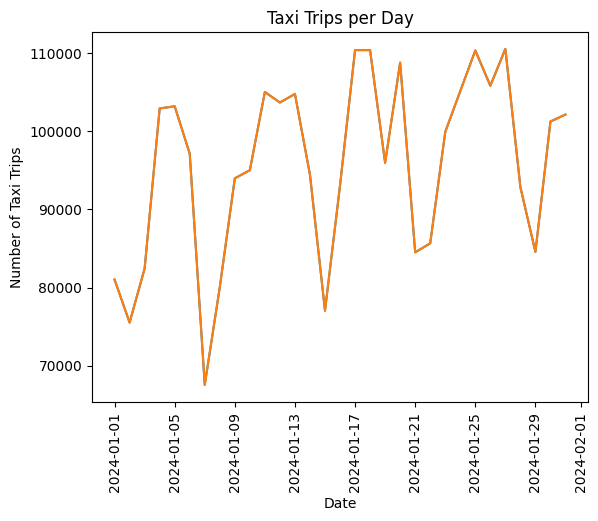

In [16]:
date_counts = dates.to_frame()
date_counts['day'] = dates.index
date_counts['weekday'] = date_counts['day'].dt.dayofweek
date_counts = date_counts.sort_values(by = 'day')
plt.plot(date_counts['day'], date_counts['count'])
ax = sns.lineplot(x = date_counts['day'], y = date_counts['count'])
ax.set_title('Taxi Trips per Day')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Date')
ax.tick_params(axis='x', rotation=90)


C:\Users\yiran\AppData\Local\Temp\ipykernel_209820\4112929586.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Monday' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  date_counts.loc[date_counts['weekday'] == 0, 'weekday'] = "Monday"


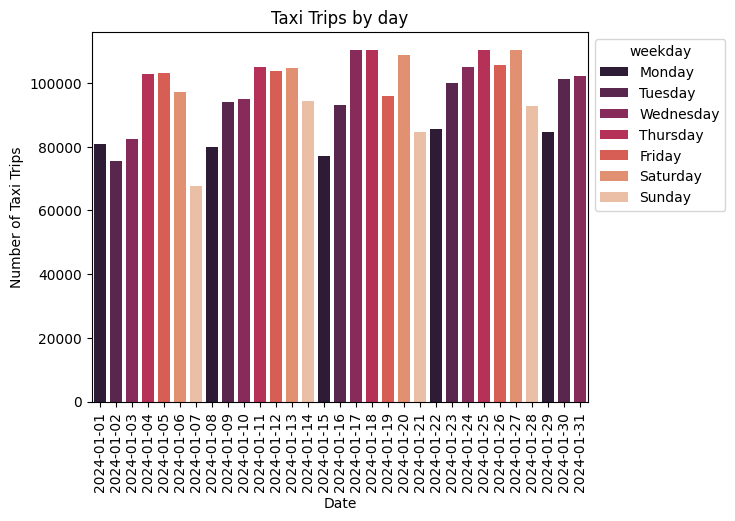

In [17]:
date_counts['weekend'] = False
date_counts.loc[date_counts['weekday'] > 4, 'weekend'] = True
date_counts.loc[date_counts['weekday'] == 0, 'weekday'] = "Monday"
date_counts.loc[date_counts['weekday'] == 1, 'weekday'] = "Tuesday"
date_counts.loc[date_counts['weekday'] == 2, 'weekday'] = "Wednesday"
date_counts.loc[date_counts['weekday'] == 3, 'weekday'] = "Thursday"
date_counts.loc[date_counts['weekday'] == 4, 'weekday'] = "Friday"
date_counts.loc[date_counts['weekday'] == 5, 'weekday'] = "Saturday"
date_counts.loc[date_counts['weekday'] == 6, 'weekday'] = "Sunday"

ax = sns.barplot(x = date_counts['day'], y = date_counts['count'], hue = date_counts['weekday'],palette= "rocket")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Taxi Trips by day')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Date')
ax.tick_params(axis='x', rotation=90)


Text(0.5, 0, 'Date')

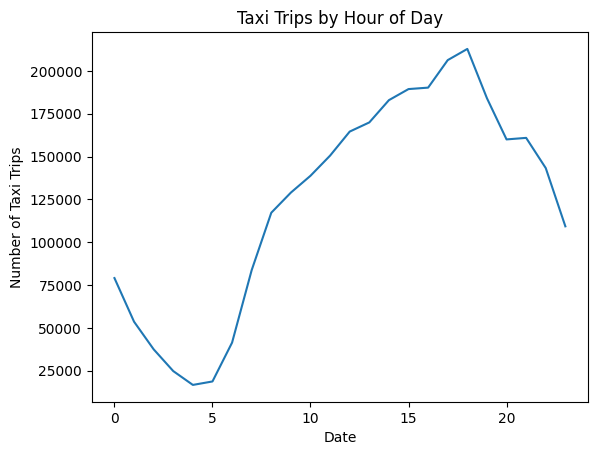

In [18]:
hours = df['tpep_pickup_datetime'].dt.hour.value_counts()
hour_counts = hours.to_frame()
hour_counts['hour'] = hours.index
hour_counts = hour_counts.sort_values(by = 'hour')
ax = sns.lineplot(x = hour_counts['hour'], y = hour_counts['count'])
ax.set_title('Taxi Trips by Hour of Day')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Date')


#### Does the distribution of trips differ by weekday?

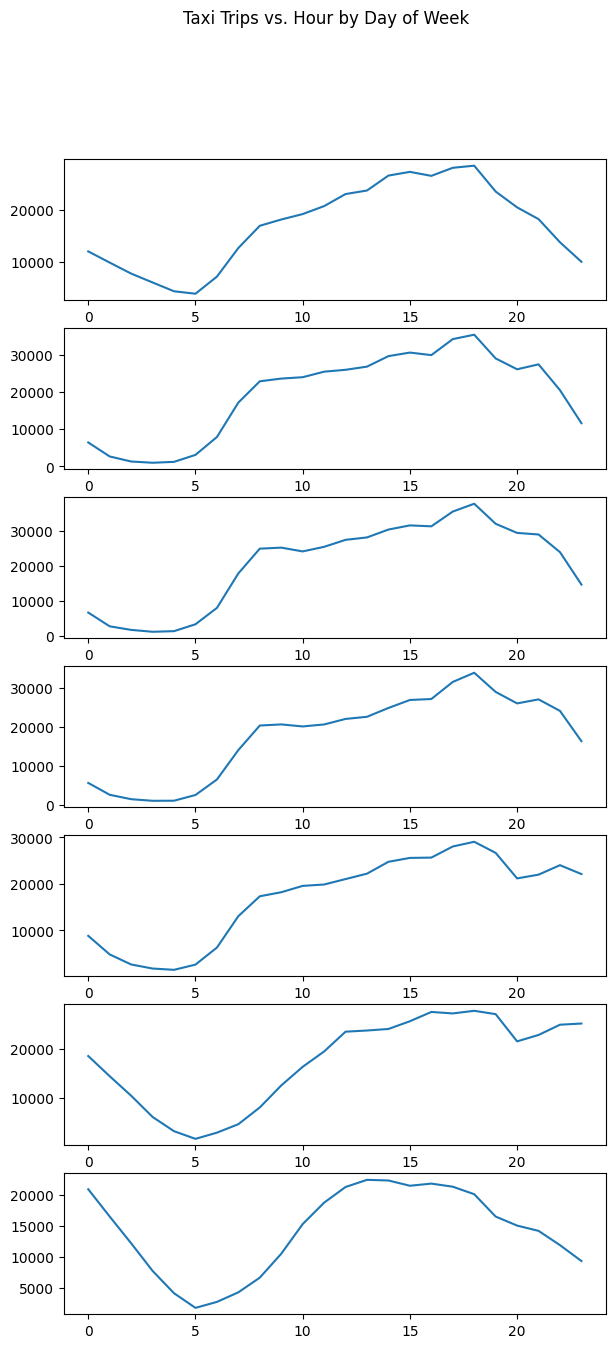

In [19]:
df_weekdays = df
df_weekdays['weekday'] = df['tpep_pickup_datetime'].dt.weekday
fig, axs = plt.subplots(7, figsize=(7,15))
fig.suptitle('Taxi Trips vs. Hour by Day of Week')
mondays = df_weekdays[df_weekdays['weekday'] == 0].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
mondays['hour'] = mondays.index
mondays = mondays.sort_values(by = 'hour')
axs[0].plot(mondays['hour'], mondays['count'])

tuesdays = df_weekdays[df_weekdays['weekday'] == 1].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
tuesdays['hour'] = tuesdays.index
tuesdays = tuesdays.sort_values(by = 'hour')
axs[1].plot(tuesdays['hour'], tuesdays['count'])

wednesdays = df_weekdays[df_weekdays['weekday'] == 2].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
wednesdays['hour'] = wednesdays.index
wednesdays = wednesdays.sort_values(by = 'hour')
axs[2].plot(wednesdays['hour'], wednesdays['count'])

thursdays = df_weekdays[df_weekdays['weekday'] == 3].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
thursdays['hour'] = thursdays.index
thursdays = thursdays.sort_values(by = 'hour')
axs[3].plot(thursdays['hour'], thursdays['count'])

fridays = df_weekdays[df_weekdays['weekday'] == 4].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
fridays['hour'] = fridays.index
fridays = fridays.sort_values(by = 'hour')
axs[4].plot(fridays['hour'], fridays['count'])

saturdays = df_weekdays[df_weekdays['weekday'] == 5].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
saturdays['hour'] = saturdays.index
saturdays = saturdays.sort_values(by = 'hour')
axs[5].plot(saturdays['hour'], saturdays['count'])

sundays = df_weekdays[df_weekdays['weekday'] == 6].tpep_pickup_datetime.dt.hour.value_counts().to_frame()
sundays['hour'] = sundays.index
sundays = sundays.sort_values(by = 'hour')
axs[6].plot(sundays['hour'], sundays['count'])




## Trend in Distance of the Trip


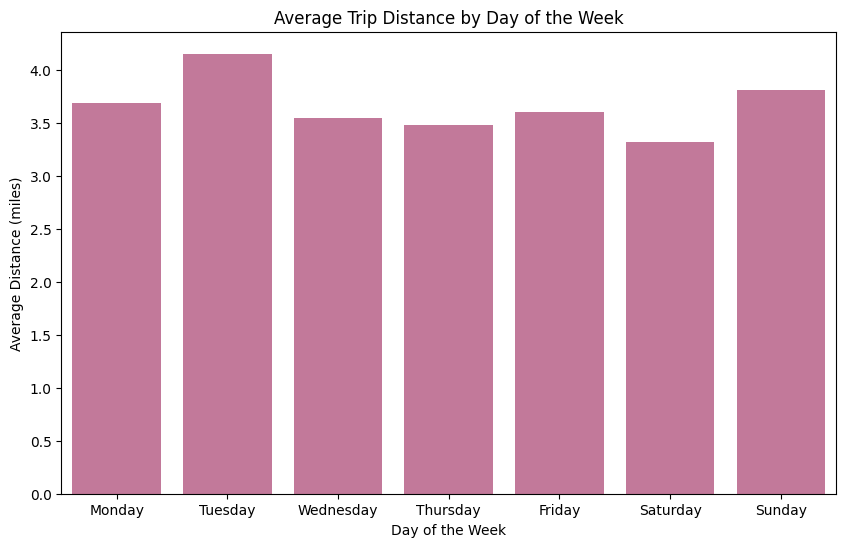

In [20]:
date_df = df.copy()
date_df['pickup_datetime'] = pd.to_datetime(date_df['tpep_pickup_datetime'])
date_df['day_of_week'] = date_df['pickup_datetime'].dt.day_name()
distance_by_day = date_df.groupby('day_of_week')['trip_distance'].agg(['mean', 'median', 'count']).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


# Bar Plot: Average trip distance by day
plt.figure(figsize=(10, 6))
sns.barplot(x=distance_by_day.index, y=distance_by_day['mean'], color= '#ba306e', alpha=0.7)
plt.title('Average Trip Distance by Day of the Week')
plt.ylabel('Average Distance (miles)')
plt.xlabel('Day of the Week')
plt.show()


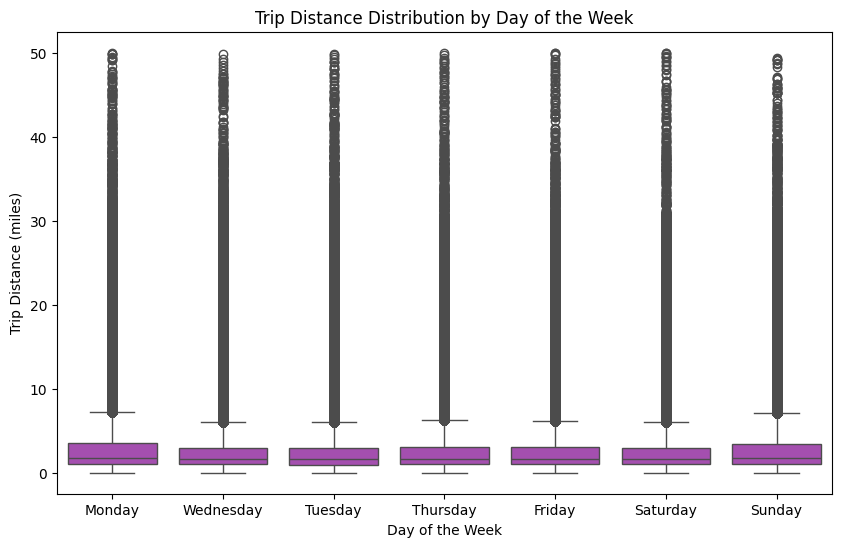

In [21]:
# Box Plot: Distribution of trip distance by day
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='trip_distance', data=date_df[date_df['trip_distance'] < 50], color = "#b03fbf")  
plt.title('Trip Distance Distribution by Day of the Week')
plt.ylabel('Trip Distance (miles)')
plt.xlabel('Day of the Week')
plt.show()

In [22]:
# find the outliers in trip distance
Q1 = date_df['trip_distance'].quantile(0.25)
Q3 = date_df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")

IQR: 2.11
Lower Bound: -2.17
Upper Bound: 6.28


**Hypothesis Testing**

Since each day of the week is a categorical data, I will use ANOVA test. 

H0: Travel distance has nothing to do with the days of the week. \
H1: Travel distance is related to the days of the week.


In [23]:
from scipy.stats import f_oneway
filtered_df = date_df[(date_df['trip_distance'] >= 0) & (date_df['trip_distance'] <= upper_bound)]
grouped = filtered_df.groupby('day_of_week')
groups = []
for name, group in grouped:
    distances = group['trip_distance'].values
    groups.append(distances)
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value (scientific): {p_value:.2e}")

F-statistic: 278.2172
P-value (scientific): 0.00e+00


Since p-value here is too small, I decided to do a Post-hoc test.


In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(
    endog=filtered_df['trip_distance'],
    groups=filtered_df['day_of_week'],
    alpha=0.05
)


print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
  Friday    Monday    0.016    0.0  0.0073  0.0248   True
  Friday  Saturday   0.0442    0.0  0.0356  0.0527   True
  Friday    Sunday   0.0438    0.0  0.0346  0.0529   True
  Friday  Thursday   0.0125 0.0003  0.0039  0.0211   True
  Friday   Tuesday  -0.0483    0.0 -0.0567 -0.0399   True
  Friday Wednesday  -0.0231    0.0 -0.0314 -0.0149   True
  Monday  Saturday   0.0281    0.0  0.0195  0.0368   True
  Monday    Sunday   0.0277    0.0  0.0185   0.037   True
  Monday  Thursday  -0.0035 0.8926 -0.0122  0.0051  False
  Monday   Tuesday  -0.0643    0.0 -0.0728 -0.0558   True
  Monday Wednesday  -0.0392    0.0 -0.0475 -0.0308   True
Saturday    Sunday  -0.0004    1.0 -0.0094  0.0086  False
Saturday  Thursday  -0.0317    0.0 -0.0401 -0.0232   True
Saturday   Tuesday  -0.0925    0.0 -0.1008 -0.0842   True
Saturday Wedne

According to the Post-hoc test result,for most day‐pairs the adjusted p-value is < 0.05 and reject=True, meaning those pairs differ significantly. It rejects H0, meaning there are relationship between trip distance and the days of the week.


**Machine Learning Model For Trends in Distance**

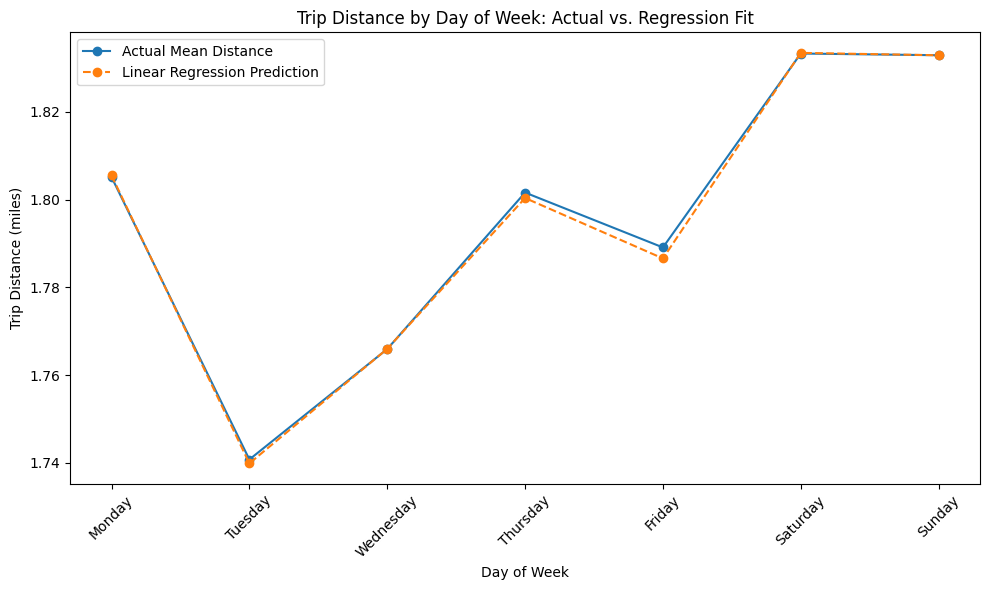

Aggregated RMSE: 0.001 miles
Aggregated R²  : 0.999


In [53]:
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

random_state = 42
np.random.seed(random_state)
test_size = 0.2
X = filtered_df[['day_of_week']]
Y = filtered_df['trip_distance']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
preprocessor = ColumnTransformer([
    ("day_ohe", OneHotEncoder(drop="first"), ["day_of_week"])
], remainder="drop")
regression_pipeline = make_pipeline(
    preprocessor,
    LinearRegression()
)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
regression_pipeline.fit(X_train, y_train)
y_pred = regression_pipeline.predict(X_test)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
actual_means = filtered_df.groupby('day_of_week')['trip_distance'].mean().reindex(day_order)
days_df = pd.DataFrame({'day_of_week': day_order})
predicted_means = regression_pipeline.predict(days_df)
plt.figure(figsize=(10, 6))
plt.plot(day_order, actual_means.values,   marker='o', label='Actual Mean Distance')
plt.plot(day_order, predicted_means, marker='o', linestyle='--', label='Linear Regression Prediction')
plt.title('Trip Distance by Day of Week: Actual vs. Regression Fit')
plt.xlabel('Day of Week')
plt.ylabel('Trip Distance (miles)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


mse_means = mean_squared_error(actual_means, predicted_means)
rmse_means = np.sqrt(mse_means)
r2_means   = r2_score(actual_means, predicted_means)

print(f"Aggregated RMSE: {rmse_means:.3f} miles")
print(f"Aggregated R²  : {r2_means:.3f}")


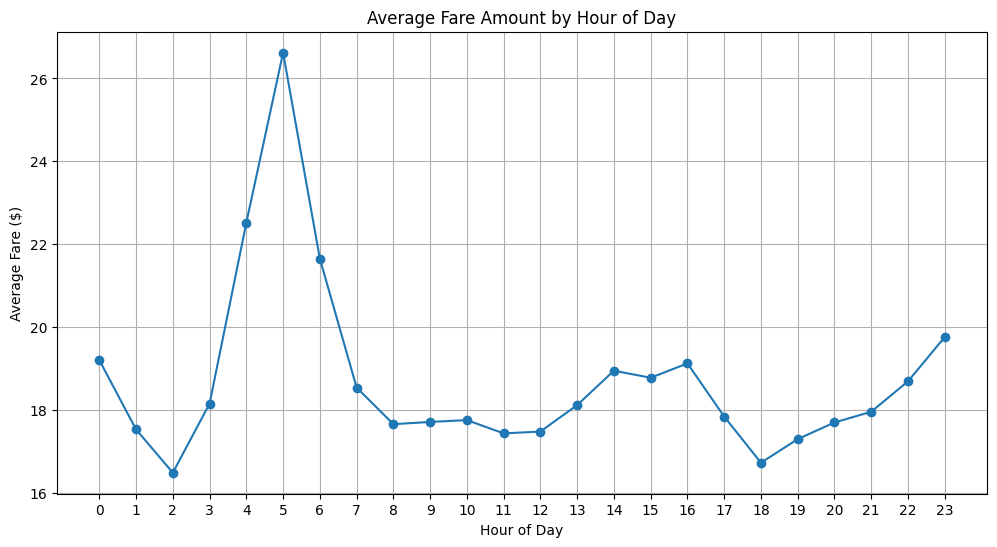

In [26]:
#Getting hour from pickup datetime
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Average fare per hour
hourly_fare = df.groupby('hour')['fare_amount'].mean()

# Plot
plt.figure(figsize=(12,6))
hourly_fare.plot(kind='line', marker='o')
plt.title('Average Fare Amount by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

We wanted to explore the trend of the average fare by hour of day. In order to do that, we did group by hour of the pickup time and calculate average fare. This helps us see if time of day affects fare trends. We can conclude that fare amounts tend to rise during evening hours (6pm–12am), suggesting increased demand or longer trips during that time.

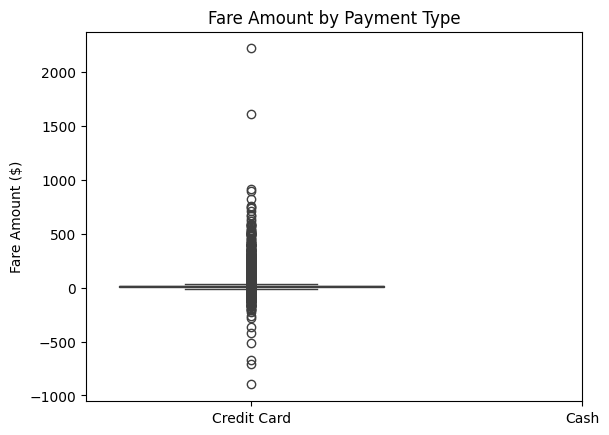

T-statistic: 20.83, P-value: 0.0000


In [27]:
#Payment type vs Fare
from scipy.stats import ttest_ind
import seaborn as sns

# Filter fares by payment type
cash_fares = df[df['payment_type'] == 2]['fare_amount']
credit_fares = df[df['payment_type'] == 1]['fare_amount']

# Boxplot
sns.boxplot(data=[credit_fares, cash_fares])
plt.xticks([0, 1], ['Credit Card', 'Cash'])
plt.title('Fare Amount by Payment Type')
plt.ylabel('Fare Amount ($)')
plt.show()

# T-test
t_stat, p_val = ttest_ind(credit_fares, cash_fares, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

We wanted to test if payment type affects the fare. In order to do that, we are implementing a Two-sample t-test. The goal is to see if there's a significant difference in fare between cash and credit card payments. With a p-value < 0.05, we can conclude there's a significant difference in average fare between credit and cash payments. Credit card fares are typically higher, maybe due to longer trips or tipping.

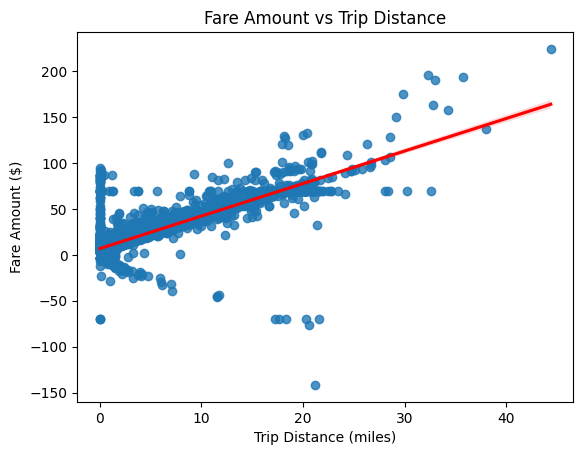

Correlation coefficient: 0.02


In [28]:
#Trip Distance vs Fare Amount
sample_df = df.sample(10000, random_state=43)

# Scatterplot with regression line
sns.regplot(x='trip_distance', y='fare_amount', data=sample_df, line_kws={'color': 'red'})
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Correlation coefficient
correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation coefficient: {correlation:.2f}")

We want to see the Correlation between Trip Distance and Fare Amount. We use the Pearson Correlation Coefficient for this. The goal is to check if longer trips lead to higher fares. We can conclude that since the correlation coefficient is about 0.90, it shows a strong positive relationship. So, as expected, longer trips lead to higher fares.